In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt
sns.set(style = "whitegrid") #font_scale = 1.3)

from IPython.display import set_matplotlib_formats

import warnings
warnings.filterwarnings("ignore")


# Mac OS를 이용하고 있기 떄문에 AppleGothic을 설정했습니다.
# 윈도우의 경우 다른 폰트를 사용해주셔야 합니다. 나눔폰트가 있는 경우 'NanumGothic' 없는 경우에는 'Malgun Gothic'을 사용해주세요.
# matplotlib.rc('font', family='AppleGothic')
matplotlib.rc('font', family='Malgun Gothic')

# 폰트를 바꿀 경우 마이너스가 표시되지 않는 경우도 있는데 이를 막아주는 코드입니다.
matplotlib.rc('axes', unicode_minus=False)
matplotlib.rcParams['axes.unicode_minus'] = False

# retina 옵션을 통해 해상도를 올립니다.
set_matplotlib_formats('retina')

# 화면에 출력하는 데이터 프레임의 최대 row 수를 500으로 설정합니다.
pd.set_option('display.max_rows', 500)

# 화면에 출력하는 데이터 프레임의 최대 column 수를 500으로 설정합니다.
pd.set_option('display.max_columns', 500)

In [2]:
train = pd.read_csv('data/train_train_train_train.csv', index_col = [0], encoding = 'euc-kr')

train.tail()

,gu,dong,exclusive_use_area,year_of_completion,floor,transaction_real_price,hanriver,transaction_year,transaction_month,transaction_date,year_mean,gu_mean,hakgun,diff_all_gu_year_mean,exclusive_use_area_group,transaction_real_price_log,gu_mean1,hakgun_rank,year_of_completion_group,supermarket,dep_shop,shop_center,all_shop,floor_han,park_gaesu,pop,gu_area,pop_dense,poppop,pop_rank,area_rank,floor_area,river_study,var_1,diff_year,rebuilding,river_re
742280,강동구,강일동,59.72,2011,9,53000,0,2017,11,1,61566.26156,58512.92187,6,3053.339686,1,10.878066,42964.64200,3,2010,3,1,0,4,1,1,440359,24.59,17909,440359,11,8,0,9,887.474883,6,0,1
742281,강동구,강일동,59.87,2009,12,53000,0,2017,11,2,61566.26156,58512.92187,6,3053.339686,1,10.878066,42964.64200,3,2000,3,1,0,4,1,0,440359,24.59,17909,440359,11,8,9,9,885.251378,8,0,1
742282,강동구,강일동,84.74,2009,3,56500,0,2017,11,2,61566.26156,58512.92187,6,3053.339686,2,10.942014,61672.76712,3,2000,3,1,0,4,1,0,440359,24.59,17909,440359,11,8,0,9,666.745339,8,0,1
742283,강동구,강일동,84.74,2009,9,55500,0,2017,11,2,61566.26156,58512.92187,6,3053.339686,2,10.924156,61672.76712,3,2000,3,1,0,4,1,0,440359,24.59,17909,440359,11,8,0,9,654.944536,8,0,1
742284,강동구,강일동,84.98,2011,8,63750,0,2017,11,2,61566.26156,58512.92187,6,3053.339686,2,11.062740,61672.76712,3,2010,3,1,0,4,1,1,440359,24.59,17909,440359,11,8,0,9,750.176512,6,0,1


In [3]:
gu_pop = pd.read_csv('data/gu_pop.csv', encoding = 'euc-kr', index_col = [0],  thousands = ',')
gu_pop

,transaction_year,gu,pop,gu_area,pop_dense
25,2008,종로구,179754,23.91,7519
26,2008,중구,138811,9.96,13936
27,2008,용산구,251043,21.87,11480
28,2008,성동구,322679,16.85,19151
29,2008,광진구,387254,17.06,22698
...,...,...,...,...,...
270,2017,관악구,520929,29.57,17617
271,2017,서초구,445401,46.99,9480
272,2017,강남구,561052,39.50,14203
273,2017,송파구,671173,33.87,19813


In [4]:
train = pd.merge(train, gu_pop, on=['gu', 'transaction_year'], how='outer')
train.tail()

,gu,dong,exclusive_use_area,year_of_completion,floor,transaction_real_price,hanriver,transaction_year,transaction_month,transaction_date,...,year_of_completion_group,supermarket,dep_shop,shop_center,all_shop,floor_han,park_gaesu,pop,gu_area,pop_dense
742280,강동구,강일동,59.72,2011,9,53000,0,2017,11,1,...,2010,3,1,0,4,1,1,440359,24.59,17909
742281,강동구,강일동,59.87,2009,12,53000,0,2017,11,2,...,2000,3,1,0,4,1,0,440359,24.59,17909
742282,강동구,강일동,84.74,2009,3,56500,0,2017,11,2,...,2000,3,1,0,4,1,0,440359,24.59,17909
742283,강동구,강일동,84.74,2009,9,55500,0,2017,11,2,...,2000,3,1,0,4,1,0,440359,24.59,17909
742284,강동구,강일동,84.98,2011,8,63750,0,2017,11,2,...,2010,3,1,0,4,1,1,440359,24.59,17909


In [5]:
gu_pop_2017 = pd.read_csv('data/gu_pop_2017.csv', encoding = 'euc-kr', index_col = [0], thousands=',')
del gu_pop_2017['gu_area']
del gu_pop_2017['pop_dense']
del gu_pop_2017['transaction_year']
gu_pop_2017

,gu,poppop,pop_rank,area_rank
271,서초구,445401,9,1
265,강서구,608255,2,2
272,강남구,561052,3,3
260,노원구,558075,4,4
273,송파구,671173,1,5
261,은평구,491202,6,6
270,관악구,520929,5,7
274,강동구,440359,11,8
257,성북구,455407,8,9
268,영등포구,402024,14,10


In [6]:
train = pd.merge(train, gu_pop_2017, on=['gu'], how='outer')
train.head()

,gu,dong,exclusive_use_area,year_of_completion,floor,transaction_real_price,hanriver,transaction_year,transaction_month,transaction_date,...,shop_center,all_shop,floor_han,park_gaesu,pop,gu_area,pop_dense,poppop,pop_rank,area_rank
0,종로구,신교동,84.82,2002,2,37500,0,2008,1,2,...,0,0,1,2,179754,23.91,7519,164257,24,11
1,종로구,필운동,99.17,1973,6,20000,0,2008,1,0,...,0,0,1,3,179754,23.91,7519,164257,24,11
2,종로구,필운동,84.74,2007,6,38500,0,2008,1,0,...,0,0,1,2,179754,23.91,7519,164257,24,11
3,종로구,내수동,146.39,2003,15,118000,0,2008,1,1,...,0,0,1,3,179754,23.91,7519,164257,24,11
4,종로구,내수동,194.43,2004,3,120000,0,2008,1,2,...,0,0,1,3,179754,23.91,7519,164257,24,11


In [12]:
j = 1
train['floor_area'] = 0
for i in range(5):
    train['floor_area'] = np.where((train['exclusive_use_area_group'] == i) & (train['floor'] == -1), j+0, train['floor_area'])
    train['floor_area'] = np.where((train['exclusive_use_area_group'] == i) & (train['floor'] >= 10), j+1, train['floor_area'])
    train['floor_area'] = np.where((train['exclusive_use_area_group'] == i) & (train['floor'] >= 20), j+2, train['floor_area'])
    train['floor_area'] = np.where((train['exclusive_use_area_group'] == i) & (train['floor'] >= 30), j+3, train['floor_area'])
    train['floor_area'] = np.where((train['exclusive_use_area_group'] == i) & (train['floor'] >= 40), j+4, train['floor_area'])
    train['floor_area'] = np.where((train['exclusive_use_area_group'] == i) & (train['floor'] >= 50), j+5, train['floor_area'])
    train['floor_area'] = np.where((train['exclusive_use_area_group'] == i) & (train['floor'] >= 60), j+6, train['floor_area'])
    j = j + 7

In [11]:
train['exclusive_use_area_group'].unique()

array([2, 3, 4, 1, 0], dtype=int64)

In [90]:
train.head(30)

,gu,dong,exclusive_use_area,year_of_completion,floor,transaction_real_price,hanriver,transaction_year,transaction_month,transaction_date,year_mean,gu_mean,hakgun,diff_all_gu_year_mean,exclusive_use_area_group,transaction_real_price_log,gu_mean1,hakgun_rank,year_of_completion_group,supermarket,dep_shop,shop_center,all_shop,floor_han,park_gaesu,pop,gu_area,pop_dense,poppop,pop_rank,area_rank,floor_area,river_study,var_1,diff_year,rebuilding,river_re
0,종로구,신교동,84.82,2002,2,37500,0,2008,1,2,39560.88147,37679.71175,5,1881.169717,2,10.532123,41762.02466,2,2000,0,0,0,0,1,2,179754,23.91,7519,164257,24,11,0,9,442.112709,6,0,1
1,종로구,필운동,99.17,1973,6,20000,0,2008,1,0,39560.88147,37679.71175,5,1881.169717,3,9.903538,66761.06690,2,1970,0,0,0,0,1,3,179754,23.91,7519,164257,24,11,0,9,201.673893,35,1,3
2,종로구,필운동,84.74,2007,6,38500,0,2008,1,0,39560.88147,37679.71175,5,1881.169717,2,10.558439,41762.02466,2,2000,0,0,0,0,1,2,179754,23.91,7519,164257,24,11,0,9,454.330895,1,0,1
3,종로구,내수동,146.39,2003,15,118000,0,2008,1,1,39560.88147,37679.71175,5,1881.169717,4,11.678448,120900.15770,2,2000,0,0,0,0,1,3,179754,23.91,7519,164257,24,11,30,9,806.065988,5,0,1
4,종로구,내수동,194.43,2004,3,120000,0,2008,1,2,39560.88147,37679.71175,5,1881.169717,4,11.695255,120900.15770,2,2000,0,0,0,0,1,3,179754,23.91,7519,164257,24,11,0,9,617.188705,4,0,1
5,종로구,인의동,106.81,2006,16,67000,0,2008,1,0,39560.88147,37679.71175,5,1881.169717,3,11.112463,66761.06690,2,2000,0,0,0,0,1,1,179754,23.91,7519,164257,24,11,23,9,627.282090,2,0,1
6,종로구,인의동,92.81,2006,7,50270,0,2008,1,0,39560.88147,37679.71175,5,1881.169717,2,10.825184,41762.02466,2,2000,0,0,0,0,1,1,179754,23.91,7519,164257,24,11,0,9,541.644219,2,0,1
7,종로구,인의동,98.39,2006,7,46000,0,2008,1,1,39560.88147,37679.71175,5,1881.169717,3,10.736418,66761.06690,2,2000,0,0,0,0,1,1,179754,23.91,7519,164257,24,11,0,9,467.527188,2,0,1
8,종로구,인의동,84.64,2006,15,35368,0,2008,1,2,39560.88147,37679.71175,5,1881.169717,2,10.473591,41762.02466,2,2000,0,0,0,0,1,1,179754,23.91,7519,164257,24,11,16,9,417.863894,2,0,1
9,종로구,인의동,84.98,2006,7,46800,0,2008,1,2,39560.88147,37679.71175,5,1881.169717,2,10.753660,41762.02466,2,2000,0,0,0,0,1,1,179754,23.91,7519,164257,24,11,0,9,550.717816,2,0,1


In [45]:
train.loc[train['hanriver'] == 1]['hakgun_rank'].unique()

array([2, 4, 6, 7, 8, 5, 1, 3], dtype=int64)

In [91]:
train['study_re'] = 0
train['study_re'] = np.where((train['hakgun_rank'] == 1) & (train['rebuilding'] == 0), 1, train['study_re'])
train['study_re'] = np.where((train['hakgun_rank'] == 1) & (train['rebuilding'] == 1), 2, train['study_re'])
train['study_re'] = np.where((train['hakgun_rank'] == 2) & (train['rebuilding'] == 0), 3, train['study_re'])
train['study_re'] = np.where((train['hakgun_rank'] == 2) & (train['rebuilding'] == 1), 4, train['study_re'])
train['study_re'] = np.where((train['hakgun_rank'] == 3) & (train['rebuilding'] == 0), 5, train['study_re'])
train['study_re'] = np.where((train['hakgun_rank'] == 3) & (train['rebuilding'] == 1), 6, train['study_re'])
train['study_re'] = np.where((train['hakgun_rank'] == 4) & (train['rebuilding'] == 0), 7, train['study_re'])
train['study_re'] = np.where((train['hakgun_rank'] == 4) & (train['rebuilding'] == 1), 8, train['study_re'])
train['study_re'] = np.where((train['hakgun_rank'] == 5) & (train['rebuilding'] == 0), 9, train['study_re'])
train['study_re'] = np.where((train['hakgun_rank'] == 5) & (train['rebuilding'] == 1), 10, train['study_re'])
train['study_re'] = np.where((train['hakgun_rank'] == 6) & (train['rebuilding'] == 0), 11, train['study_re'])
train['study_re'] = np.where((train['hakgun_rank'] == 6) & (train['rebuilding'] == 1), 12, train['study_re'])
train['study_re'] = np.where((train['hakgun_rank'] == 7) & (train['rebuilding'] == 0), 13, train['study_re'])
train['study_re'] = np.where((train['hakgun_rank'] == 7) & (train['rebuilding'] == 1), 14, train['study_re'])
train['study_re'] = np.where((train['hakgun_rank'] == 8) & (train['rebuilding'] == 0), 15, train['study_re'])
train['study_re'] = np.where((train['hakgun_rank'] == 8) & (train['rebuilding'] == 1), 16, train['study_re'])
train['study_re'] = np.where((train['hakgun_rank'] == 9) & (train['rebuilding'] == 0), 17, train['study_re'])
train['study_re'] = np.where((train['hakgun_rank'] == 9) & (train['rebuilding'] == 1), 18, train['study_re'])
train['study_re'] = np.where((train['hakgun_rank'] == 10) & (train['rebuilding'] == 0), 19, train['study_re'])
train['study_re'] = np.where((train['hakgun_rank'] == 10) & (train['rebuilding'] == 1), 20, train['study_re'])
train['study_re'] = np.where((train['hakgun_rank'] == 11) & (train['rebuilding'] == 0), 21, train['study_re'])
train['study_re'] = np.where((train['hakgun_rank'] == 11) & (train['rebuilding'] == 1), 22, train['study_re'])




In [46]:
train['river_study'] = 9
train['river_study'] = np.where((train['hanriver'] == 1) & (train['hakgun_rank'] == 1), 1, train['river_study'])
train['river_study'] = np.where((train['hanriver'] == 1) & (train['hakgun_rank'] == 2), 2, train['river_study'])
train['river_study'] = np.where((train['hanriver'] == 1) & (train['hakgun_rank'] == 3), 3, train['river_study'])
train['river_study'] = np.where((train['hanriver'] == 1) & (train['hakgun_rank'] == 4), 4, train['river_study'])
train['river_study'] = np.where((train['hanriver'] == 1) & (train['hakgun_rank'] == 5), 5, train['river_study'])
train['river_study'] = np.where((train['hanriver'] == 1) & (train['hakgun_rank'] == 6), 6, train['river_study'])
train['river_study'] = np.where((train['hanriver'] == 1) & (train['hakgun_rank'] == 7), 7, train['river_study'])
train['river_study'] = np.where((train['hanriver'] == 1) & (train['hakgun_rank'] == 8), 8, train['river_study'])


1

In [63]:
train['var_1'] = train['transaction_real_price']/train['exclusive_use_area']

In [65]:
train['diff_year'] = train['transaction_year'] - train['year_of_completion']
train['rebuilding'] = train['diff_year'].apply(lambda x: 1 if x>=30 else 0)

In [70]:
train['rebuilding'] = train['diff_year'].apply(lambda x: 1 if x>=30 else 0)
train.head()

,gu,dong,exclusive_use_area,year_of_completion,floor,transaction_real_price,hanriver,transaction_year,transaction_month,transaction_date,...,gu_area,pop_dense,poppop,pop_rank,area_rank,floor_area,river_study,var_1,diff_year,rebuilding
0,종로구,신교동,84.82,2002,2,37500,0,2008,1,2,...,23.91,7519,164257,24,11,0,9,442.112709,6,0
1,종로구,필운동,99.17,1973,6,20000,0,2008,1,0,...,23.91,7519,164257,24,11,0,9,201.673893,35,1
2,종로구,필운동,84.74,2007,6,38500,0,2008,1,0,...,23.91,7519,164257,24,11,0,9,454.330895,1,0
3,종로구,내수동,146.39,2003,15,118000,0,2008,1,1,...,23.91,7519,164257,24,11,30,9,806.065988,5,0
4,종로구,내수동,194.43,2004,3,120000,0,2008,1,2,...,23.91,7519,164257,24,11,0,9,617.188705,4,0


In [87]:
train['river_re'] = 0
train['river_re'] = np.where((train['hanriver'] == 0) & (train['rebuilding'] == 0), 1, train['river_re'])
train['river_re'] = np.where((train['hanriver'] == 1) & (train['rebuilding'] == 0), 2, train['river_re'])
train['river_re'] = np.where((train['hanriver'] == 0) & (train['rebuilding'] == 1), 3, train['river_re'])
train['river_re'] = np.where((train['hanriver'] == 1) & (train['rebuilding'] == 1), 4, train['river_re'])



In [76]:
train.to_csv('data/train_train_train_train.csv', encoding = 'euc-kr')

In [73]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742285 entries, 0 to 742284
Data columns (total 37 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   gu                          742285 non-null  object 
 1   dong                        742285 non-null  object 
 2   exclusive_use_area          742285 non-null  float64
 3   year_of_completion          742285 non-null  int64  
 4   floor                       742285 non-null  int64  
 5   transaction_real_price      742285 non-null  int64  
 6   hanriver                    742285 non-null  int64  
 7   transaction_year            742285 non-null  int64  
 8   transaction_month           742285 non-null  int64  
 9   transaction_date            742285 non-null  int64  
 10  year_mean                   742285 non-null  float64
 11  gu_mean                     742285 non-null  float64
 12  hakgun                      742285 non-null  int64  
 13  diff_all_gu_ye

In [92]:
train.corr()['transaction_real_price'] 

exclusive_use_area            0.668717
year_of_completion           -0.005060
floor                         0.142295
transaction_real_price        1.000000
hanriver                      0.267099
transaction_year              0.115091
transaction_month             0.041785
transaction_date              0.013548
year_mean                     0.174841
gu_mean                       0.638456
hakgun                        0.220111
diff_all_gu_year_mean        -0.614050
exclusive_use_area_group      0.603305
transaction_real_price_log    0.899089
gu_mean1                      0.675221
hakgun_rank                  -0.518919
year_of_completion_group     -0.006486
supermarket                  -0.114239
dep_shop                      0.339888
shop_center                   0.152686
all_shop                      0.202347
floor_han                     0.212114
park_gaesu                   -0.241588
pop                           0.076535
gu_area                       0.267520
pop_dense                

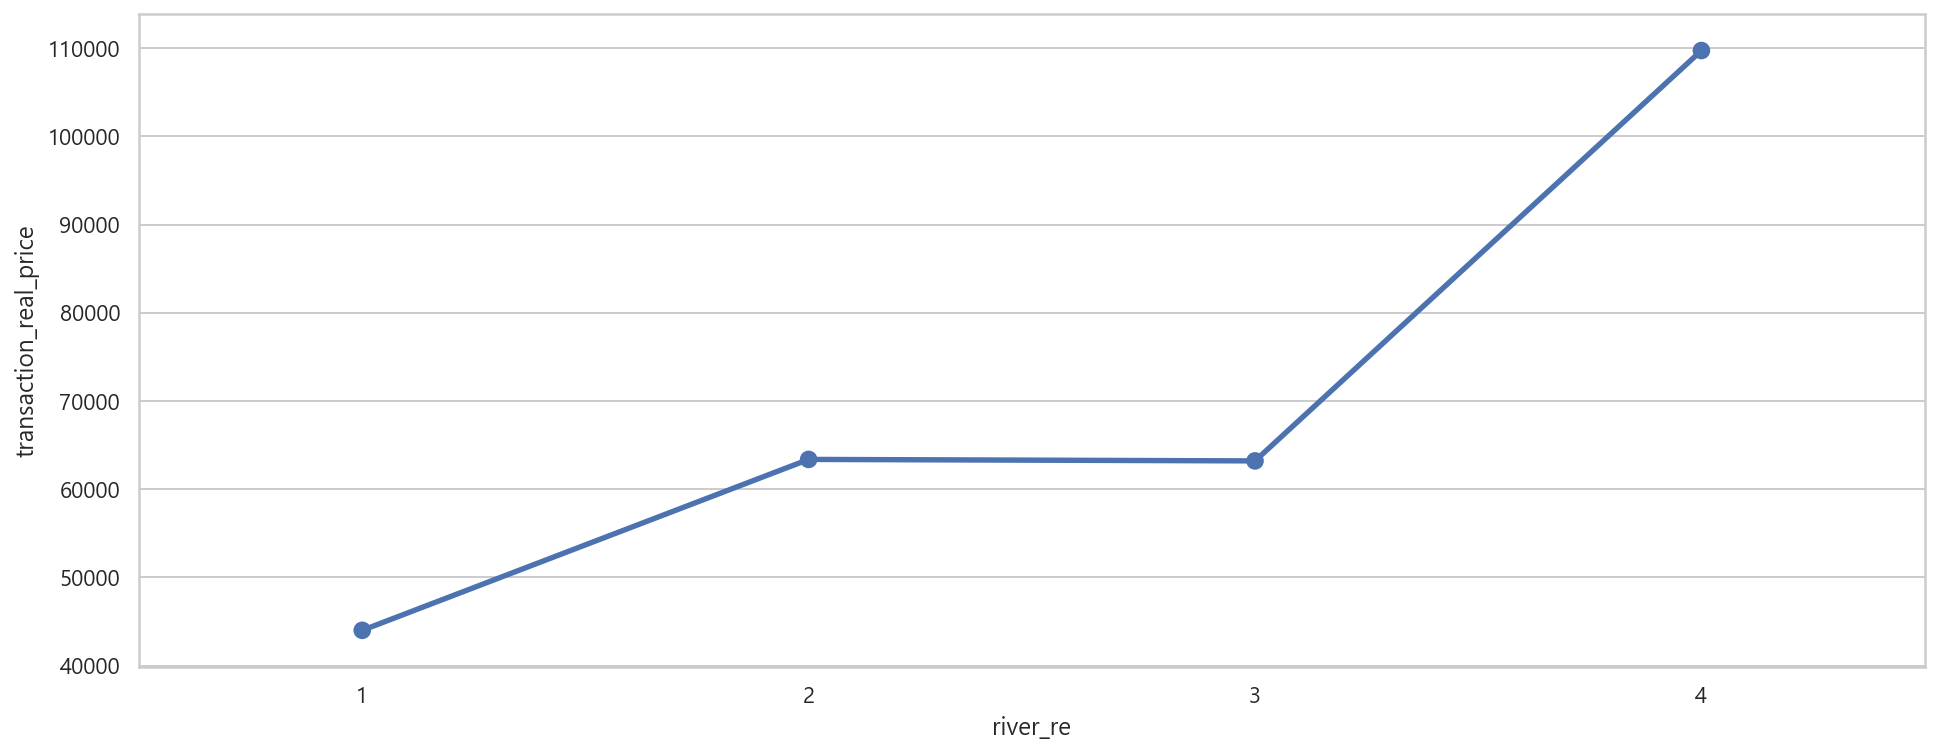

In [89]:
plt.figure(figsize = (16, 6))
plt.title("", fontsize = 20, fontweight = "bold")

sns.pointplot(data = df_river_re, x = "river_re", y = "transaction_real_price")

In [86]:
df_river_re

,river_re,transaction_real_price
0,1,43993.774181
1,2,63374.737761
2,3,63205.481286
3,4,109735.543793


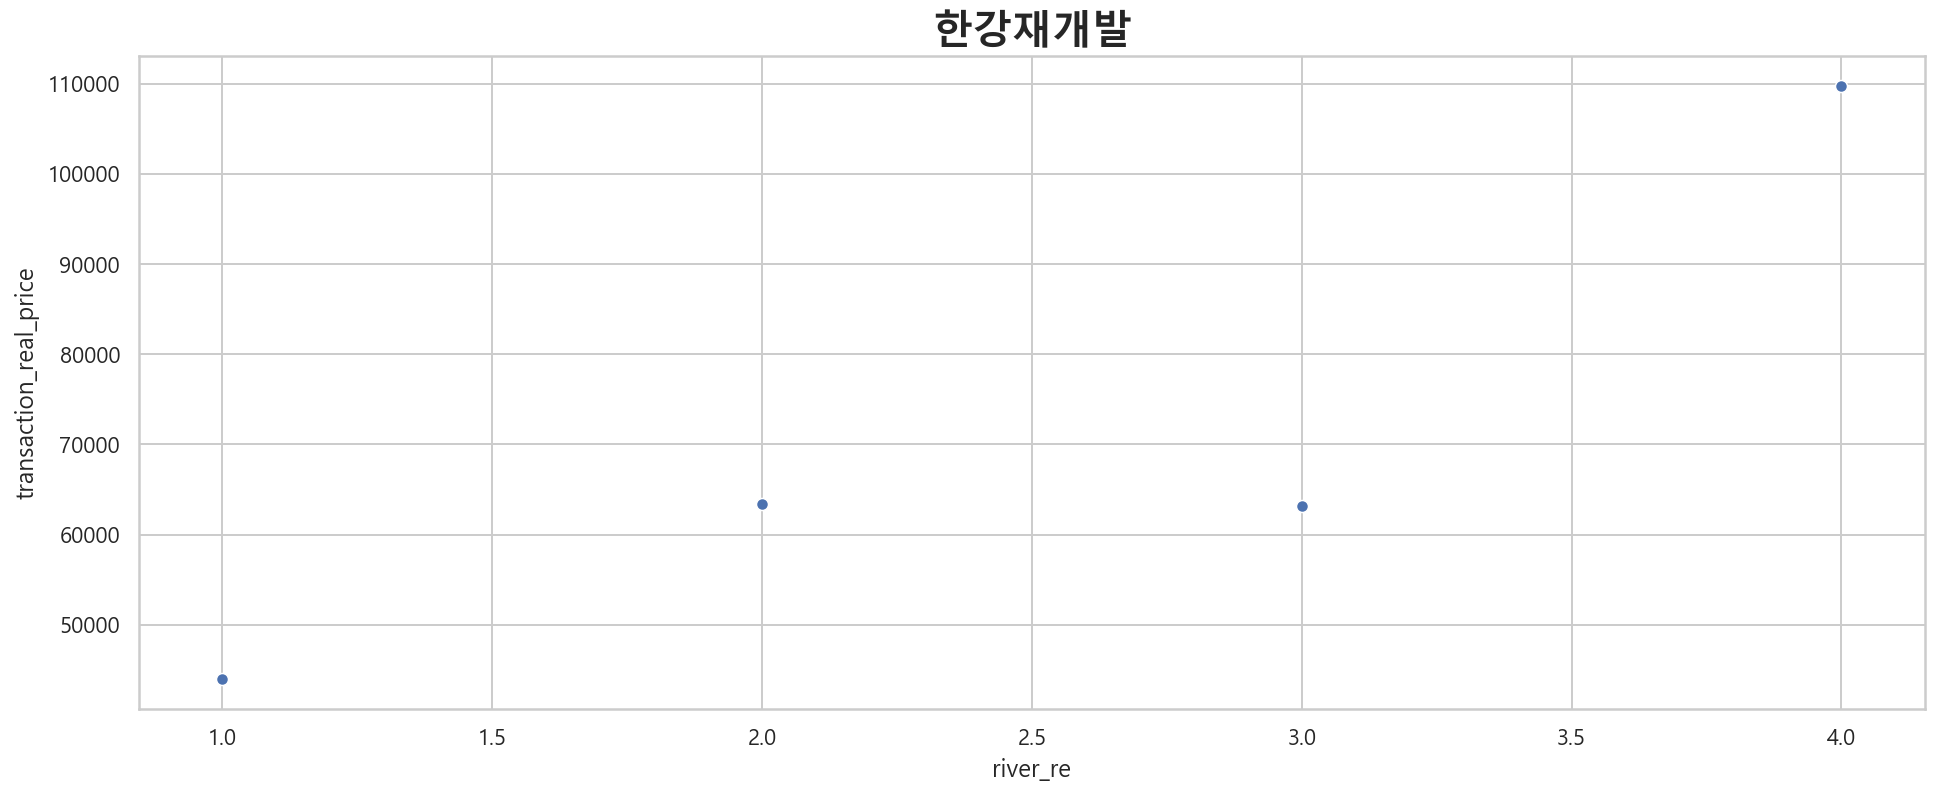

In [84]:
df_river_re = train.groupby(["river_re"])["transaction_real_price"].mean().reset_index()
# df_river_re
plt.figure(figsize = (16, 6))
plt.title("한강재개발", fontsize = 20, fontweight = "bold")

sns.scatterplot(data = df_river_re, x = "river_re", y = "transaction_real_price")

plt.show()

In [26]:
train.loc[train['gu'] == '노원구']['park_gaesu'].mean()

2.220357205251912

In [42]:
train.loc[train['dong'] == '목동']

,gu,dong,exclusive_use_area,year_of_completion,floor,transaction_real_price,hanriver,transaction_year,transaction_month,transaction_date,...,all_shop,floor_han,park_gaesu,pop,gu_area,pop_dense,poppop,pop_rank,area_rank,floor_area
347094,양천구,목동,59.39,1988,5,50000,0,2008,1,0,...,4,1,0,507899,17.40,29183,475018,7,19,0
347095,양천구,목동,95.67,1986,4,101000,0,2008,1,0,...,4,1,0,507899,17.40,29183,475018,7,19,0
347096,양천구,목동,84.66,2004,3,25500,0,2008,1,0,...,4,1,1,507899,17.40,29183,475018,7,19,0
347097,양천구,목동,84.75,1999,4,70000,0,2008,1,0,...,4,1,1,507899,17.40,29183,475018,7,19,0
347098,양천구,목동,84.82,1994,2,56800,0,2008,1,0,...,4,1,0,507899,17.40,29183,475018,7,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384199,양천구,목동,84.77,2006,10,42500,0,2017,11,2,...,4,1,0,475018,17.41,27289,475018,7,19,16
384200,양천구,목동,101.20,1988,9,146000,0,2017,11,2,...,4,1,0,475018,17.41,27289,475018,7,19,0
384201,양천구,목동,66.60,1988,2,94700,0,2017,11,2,...,4,1,0,475018,17.41,27289,475018,7,19,0
384202,양천구,목동,152.64,1986,4,180000,0,2017,11,2,...,4,1,2,475018,17.41,27289,475018,7,19,0


In [19]:
train.loc[train['park_gaesu'] == 3]['gu'].unique()

array(['종로구', '중구', '중랑구', '강북구', '도봉구', '노원구', '은평구', '서대문구', '양천구',
       '구로구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [20]:
train.loc[train['park_gaesu'] == 2]['gu'].unique()

array(['종로구', '중구', '성동구', '동대문구', '중랑구', '성북구', '강북구', '도봉구', '노원구',
       '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '동작구', '관악구', '서초구',
       '강남구', '송파구', '강동구'], dtype=object)

In [21]:
train.loc[train['park_gaesu'] == 1]['gu'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [22]:
train.loc[train['park_gaesu'] == 0]['gu'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구',
       '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [39]:
# a = train.pivot_table('gu', 'park_gaesu')
a = train.pivot_table('pop', 'gu')

a.sort_values(by = ['pop'], ascending = True)

,pop
gu,
중구,136713.714784
종로구,169334.777953
용산구,249385.523008
금천구,258786.579092
성동구,309571.887377
서대문구,326964.277582
강북구,338417.331212
도봉구,360086.238129
동대문구,374160.178317


,gu,exclusive_use_area_group
0,종로구,2
1,종로구,3
2,종로구,2
3,종로구,4
4,종로구,4
...,...,...
742280,강동구,1
742281,강동구,1
742282,강동구,2
742283,강동구,2


In [213]:

# for i in
a = []
df_1 = train.loc[train['gu']=='강남구']
val_1 = df_1.loc[(df_1['exclusive_use_area_group'] == 0) & ((df_1['transaction_year'] >= 2008)&(df_1['transaction_year'] <= 2009))]['transaction_real_price'].mean()
val_2 = df_1.loc[(df_1['exclusive_use_area_group'] == 0) & ((df_1['transaction_year'] >= 2009)&(df_1['transaction_year'] <= 2010))]['transaction_real_price'].mean()
val_3 = df_1.loc[(df_1['exclusive_use_area_group'] == 0) & ((df_1['transaction_year'] >= 2013)&(df_1['transaction_year'] <= 2013))]['transaction_real_price'].mean()
val_4 = df_1.loc[(df_1['exclusive_use_area_group'] == 0) & ((df_1['transaction_year'] >= 2014)&(df_1['transaction_year'] <= 2017))]['transaction_real_price'].mean()
a.append(round((val_2 - val_1) / val_1 * 100, 2))
a.append(round((val_3 - val_2) / val_2 * 100, 2))
a.append(round((val_4 - val_3) / val_3 * 100, 2))


print('')
val_1 = df_1.loc[(df_1['exclusive_use_area_group'] == 1) & ((df_1['transaction_year'] >= 2008)&(df_1['transaction_year'] <= 2009))]['transaction_real_price'].mean()
val_2 = df_1.loc[(df_1['exclusive_use_area_group'] == 1) & ((df_1['transaction_year'] >= 2009)&(df_1['transaction_year'] <= 2010))]['transaction_real_price'].mean()
val_3 = df_1.loc[(df_1['exclusive_use_area_group'] == 1) & ((df_1['transaction_year'] >= 2013)&(df_1['transaction_year'] <= 2013))]['transaction_real_price'].mean()
val_4 = df_1.loc[(df_1['exclusive_use_area_group'] == 1) & ((df_1['transaction_year'] >= 2014)&(df_1['transaction_year'] <= 2017))]['transaction_real_price'].mean()
a.append(round((val_2 - val_1) / val_1 * 100, 2))
a.append(round((val_3 - val_2) / val_2 * 100, 2))
a.append(round((val_4 - val_3) / val_3 * 100, 2))

print('')
val_1 = df_1.loc[(df_1['exclusive_use_area_group'] == 2) & ((df_1['transaction_year'] >= 2008)&(df_1['transaction_year'] <= 2009))]['transaction_real_price'].mean()
val_2 = df_1.loc[(df_1['exclusive_use_area_group'] == 2) & ((df_1['transaction_year'] >= 2009)&(df_1['transaction_year'] <= 2010))]['transaction_real_price'].mean()
val_3 = df_1.loc[(df_1['exclusive_use_area_group'] == 2) & ((df_1['transaction_year'] >= 2013)&(df_1['transaction_year'] <= 2013))]['transaction_real_price'].mean()
val_4 = df_1.loc[(df_1['exclusive_use_area_group'] == 2) & ((df_1['transaction_year'] >= 2014)&(df_1['transaction_year'] <= 2017))]['transaction_real_price'].mean()
a.append(round((val_2 - val_1) / val_1 * 100, 2))
a.append(round((val_3 - val_2) / val_2 * 100, 2))
a.append(round((val_4 - val_3) / val_3 * 100, 2))

print('')
val_1 = df_1.loc[(df_1['exclusive_use_area_group'] == 3) & ((df_1['transaction_year'] >= 2008)&(df_1['transaction_year'] <= 2009))]['transaction_real_price'].mean()
val_2 = df_1.loc[(df_1['exclusive_use_area_group'] == 3) & ((df_1['transaction_year'] >= 2009)&(df_1['transaction_year'] <= 2010))]['transaction_real_price'].mean()
val_3 = df_1.loc[(df_1['exclusive_use_area_group'] == 3) & ((df_1['transaction_year'] >= 2013)&(df_1['transaction_year'] <= 2013))]['transaction_real_price'].mean()
val_4 = df_1.loc[(df_1['exclusive_use_area_group'] == 3) & ((df_1['transaction_year'] >= 2014)&(df_1['transaction_year'] <= 2017))]['transaction_real_price'].mean()
a.append(round((val_2 - val_1) / val_1 * 100, 2))
a.append(round((val_3 - val_2) / val_2 * 100, 2))
a.append(round((val_4 - val_3) / val_3 * 100, 2))

print('')
val_1 = df_1.loc[(df_1['exclusive_use_area_group'] == 4) & ((df_1['transaction_year'] >= 2008)&(df_1['transaction_year'] <= 2009))]['transaction_real_price'].mean()
val_2 = df_1.loc[(df_1['exclusive_use_area_group'] == 4) & ((df_1['transaction_year'] >= 2009)&(df_1['transaction_year'] <= 2010))]['transaction_real_price'].mean()
val_3 = df_1.loc[(df_1['exclusive_use_area_group'] == 4) & ((df_1['transaction_year'] >= 2013)&(df_1['transaction_year'] <= 2013))]['transaction_real_price'].mean()
val_4 = df_1.loc[(df_1['exclusive_use_area_group'] == 4) & ((df_1['transaction_year'] >= 2014)&(df_1['transaction_year'] <= 2017))]['transaction_real_price'].mean()
a.append(round((val_2 - val_1) / val_1 * 100, 2))
a.append(round((val_3 - val_2) / val_2 * 100, 2))
a.append(round((val_4 - val_3) / val_3 * 100, 2))

a


[6.97,
 1.4,
 27.35,
 2.53,
 -9.6,
 26.67,
 2.66,
 -9.5,
 25.18,
 2.19,
 -11.38,
 17.4,
 -0.22,
 -10.63,
 10.39]

In [189]:
df_1

,gu,dong,exclusive_use_area,year_of_completion,floor,transaction_real_price,hanriver,transaction_year,transaction_month,transaction_date,year_mean,gu_mean,hakgun,diff_all_gu_year_mean,exclusive_use_area_group,transaction_real_price_log,gu_mean1,hakgun_rank,year_of_completion_group,supermarket,dep_shop,shop_center,all_shop,floor_han,park_gaesu,pop,gu_area,pop_dense,poppop,pop_rank,area_rank,floor_area,river_study,var_1,diff_year,rebuilding,river_re,study_re
597851,강남구,역삼동,84.9600,1997,1,56000,0,2008,1,0,39560.88147,75457.95825,8,-35897.07678,2,10.933125,41762.02466,1,1990,2,5,3,10,1,1,565624,39.54,14307,561052,3,3,0,9,659.133710,11,0,1,1
597852,강남구,역삼동,43.5800,2001,26,15800,0,2008,1,0,39560.88147,75457.95825,8,-35897.07678,1,9.667829,28641.42616,1,2000,2,5,3,10,1,1,565624,39.54,14307,561052,3,3,10,9,362.551629,7,0,1,1
597853,강남구,역삼동,59.7300,2005,20,67000,0,2008,1,0,39560.88147,75457.95825,8,-35897.07678,1,11.112463,28641.42616,1,2000,2,5,3,10,1,1,565624,39.54,14307,561052,3,3,10,9,1121.714381,3,0,1,1
597854,강남구,역삼동,30.0300,2002,15,14700,0,2008,1,0,39560.88147,75457.95825,8,-35897.07678,0,9.595671,18292.78412,1,2000,2,5,3,10,1,1,565624,39.54,14307,561052,3,3,2,9,489.510490,6,0,1,1
597855,강남구,역삼동,30.0300,2002,8,15000,0,2008,1,0,39560.88147,75457.95825,8,-35897.07678,0,9.615872,18292.78412,1,2000,2,5,3,10,1,0,565624,39.54,14307,561052,3,3,0,9,499.500500,6,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647543,강남구,도곡동,114.9931,2006,10,190000,0,2017,11,2,61566.26156,125918.41450,8,-64352.15289,3,12.154785,86604.46317,1,2000,1,6,3,10,1,1,561052,39.50,14203,561052,3,3,23,9,1652.273049,11,0,1,1
647544,강남구,도곡동,174.6700,2002,18,240000,0,2017,11,2,61566.26156,125918.41450,8,-64352.15289,4,12.388398,157704.71210,1,2000,1,6,3,10,1,1,561052,39.50,14203,561052,3,3,30,9,1374.019580,15,0,1,1
647545,강남구,도곡동,134.9023,2006,6,238000,0,2017,11,2,61566.26156,125918.41450,8,-64352.15289,3,12.380030,86604.46317,1,2000,1,6,3,10,1,1,561052,39.50,14203,561052,3,3,0,9,1764.239750,11,0,1,1
647546,강남구,도곡동,84.9984,2006,9,159000,0,2017,11,2,61566.26156,125918.41450,8,-64352.15289,2,11.976666,61672.76712,1,2000,1,6,3,10,1,1,561052,39.50,14203,561052,3,3,0,9,1870.623447,11,0,1,1


In [ ]:
train['']

In [140]:
gu_area_price = train.groupby(['gu','exclusive_use_area_group','transaction_year'])['transaction_real_price'].mean()
gu_area_price=pd.DataFrame(gu_area_price)
gu_area_price

transaction_real_price
gu  exclusive_use_area_group transaction_year                        
강남구 0                        2008                        27031.935599
                             2009                        34307.544990
                             2010                        33171.045603
                             2011                        35643.421769
                             2012                        34131.162791
...                                                               ...
중랑구 4                        2013                        75375.000000
                             2014                        73039.166667
                             2015                        52366.666667
                             2016                        75922.153846
                             2017                        85750.000000

[1238 rows x 1 columns]

In [180]:
gu_area_price.loc[['강남구']]

transaction_real_price
gu  exclusive_use_area_group transaction_year                        
강남구 0                        2008                        27031.935599
                             2009                        34307.544990
                             2010                        33171.045603
                             2011                        35643.421769
                             2012                        34131.162791
                             2013                        34342.521815
                             2014                        34688.000000
                             2015                        41728.208861
                             2016                        46242.944681
                             2017                        56110.082312
    1                        2008                        57277.789928
                             2009                        66419.844444
                             2010                        63670.424926
                             2011                        63048.254237
                             2012                        59580.526316
                             2013                        59116.316141
                             2014                        61431.344801
                             2015                        67537.518625
                             2016                        79493.678065
                             2017                        91882.343239
    2                        2008                        78524.914358
                             2009                        85429.808023
                             2010                        86282.152381
                             2011                        82993.433107
                             2012                        78640.355713
                             2013                        77603.792441
                             2014                        81337.877803
                             2015                        87450.529412
                             2016                        99861.059237
                             2017                       118604.200285
    3                        2008                       112756.260317
                             2009                       122456.591356
                             2010                       123430.838475
                             2011                       114256.675170
                             2012                       109891.211538
                             2013                       108820.275735
                             2014                       109301.796281
                             2015                       118695.319423
                             2016                       129894.110044
                             2017                       150886.728064
    4                        2008                       189392.044643
                             2009                       202109.840804
                             2010                       191591.603399
                             2011                       183949.101983
                             2012                       179322.217391
                             2013                       177298.231915
                             2014                       180066.357550
                             2015                       183803.001120
                             2016                       202952.555834
                             2017                       217474.532967

In [184]:
# for i in 
gu_area_price.loc[['강남구']].unstack()
# len(gu_area_price)
# gu_area_price.iloc[10:13]

transaction_real_price                 \
transaction_year                               2008           2009   
gu  exclusive_use_area_group                                         
강남구 0                                  27031.935599   34307.544990   
    1                                  57277.789928   66419.844444   
    2                                  78524.914358   85429.808023   
    3                                 112756.260317  122456.591356   
    4                                 189392.044643  202109.840804   

                                                                           \
transaction_year                       2010           2011           2012   
gu  exclusive_use_area_group                                                
강남구 0                          33171.045603   35643.421769   34131.162791   
    1                          63670.424926   63048.254237   59580.526316   
    2                          86282.152381   82993.433107   78640.355713   
    3                         123430.838475  114256.675170  109891.211538   
    4                         191591.603399  183949.101983  179322.217391   

                                                                           \
transaction_year                       2013           2014           2015   
gu  exclusive_use_area_group                                                
강남구 0                          34342.521815   34688.000000   41728.208861   
    1                          59116.316141   61431.344801   67537.518625   
    2                          77603.792441   81337.877803   87450.529412   
    3                         108820.275735  109301.796281  118695.319423   
    4                         177298.231915  180066.357550  183803.001120   

                                                            
transaction_year                       2016           2017  
gu  exclusive_use_area_group                                
강남구 0                          46242.944681   56110.082312  
    1                          79493.678065   91882.343239  
    2                          99861.059237  118604.200285  
    3                         129894.110044  150886.728064  
    4                         202952.555834  217474.532967

In [179]:
gu_area_price.loc[['강남구']].unstack()

transaction_real_price                 \
transaction_year                               2008           2009   
gu  exclusive_use_area_group                                         
강남구 0                                  27031.935599   34307.544990   
    1                                  57277.789928   66419.844444   
    2                                  78524.914358   85429.808023   
    3                                 112756.260317  122456.591356   
    4                                 189392.044643  202109.840804   

                                                                           \
transaction_year                       2010           2011           2012   
gu  exclusive_use_area_group                                                
강남구 0                          33171.045603   35643.421769   34131.162791   
    1                          63670.424926   63048.254237   59580.526316   
    2                          86282.152381   82993.433107   78640.355713   
    3                         123430.838475  114256.675170  109891.211538   
    4                         191591.603399  183949.101983  179322.217391   

                                                                           \
transaction_year                       2013           2014           2015   
gu  exclusive_use_area_group                                                
강남구 0                          34342.521815   34688.000000   41728.208861   
    1                          59116.316141   61431.344801   67537.518625   
    2                          77603.792441   81337.877803   87450.529412   
    3                         108820.275735  109301.796281  118695.319423   
    4                         177298.231915  180066.357550  183803.001120   

                                                            
transaction_year                       2016           2017  
gu  exclusive_use_area_group                                
강남구 0                          46242.944681   56110.082312  
    1                          79493.678065   91882.343239  
    2                          99861.059237  118604.200285  
    3                         129894.110044  150886.728064  
    4                         202952.555834  217474.532967